

# 1. The LASSO and Boosting for Regression

In [1]:

import numpy as np
import pandas as pd
import io
import math 
#import 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.gridspec as gridspec
# extract data and convert to numpy array
#df=pd.DataFrame.from_dict(dataDictionary)


C:\Users\manja\Anaconda2\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


## (a) Download the Communities and Crime data1 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set

In [2]:
data=pd.read_csv('comm.csv',na_values = ['?'])


## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features

In [3]:
df1=data.drop(['state','county','community','communityname','fold'],axis=1)
df=df1.fillna(df1.mean())
df_train=df.iloc[0:1495,]
df_test=df.iloc[1495:,]

## (c) Plot a correlation matrix for the features in the data set.

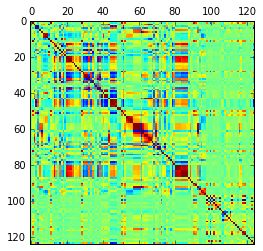

In [4]:

%matplotlib inline
plt.matshow(df.corr())

## (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample variance and m is sample mean

In [5]:
df_np=df.values
df_np
cv =lambda x: np.var(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=0, arr=df_np)
var


array([  3.32166667e+02,   2.79497086e-01,   5.78118360e-02,
         3.57407240e-01,   7.89758291e-02,   2.83755976e-01,
         3.75117846e-01,   5.67483119e-02,   4.17119617e-02,
         8.24051323e-02,   7.58365613e-02,   2.56607182e-01,
         2.84024201e-01,   1.21317748e-01,   5.99123135e-02,
         1.42809795e-01,   6.39379894e-02,   6.39485635e-02,
         1.55202490e-01,   5.85574513e-02,   1.04573937e-01,
         1.04222902e-01,   9.47653070e-02,   1.01098277e-01,
         1.33349261e-01,   1.18397464e-01,   1.28002334e-01,
         8.67293168e-02,   2.94751883e-01,   1.72178582e-01,
         1.44073477e-01,   1.06928527e-01,   1.20936806e-01,
         1.12377696e-01,   6.04172622e-02,   1.03282468e-01,
         6.98364234e-02,   1.01093468e-01,   7.85954170e-02,
         7.21420819e-02,   7.08080967e-02,   6.29021542e-02,
         6.81698042e-02,   4.89747675e-02,   6.67420972e-02,
         6.85731457e-02,   7.20255437e-02,   6.28882437e-02,
         5.66669447e-02,

In [6]:
col=df.columns.values
col

array(['id', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
       'PctImmigRec10', 'PctRecentImmig', 'PctRecImmi

In [7]:
df2=pd.DataFrame(np.column_stack([col, var])).drop([0])
df2

,0,1
1,population,0.279497
2,householdsize,0.0578118
3,racepctblack,0.357407
4,racePctWhite,0.0789758
5,racePctAsian,0.283756
6,racePctHisp,0.375118
7,agePct12t21,0.0567483
8,agePct12t29,0.041712
9,agePct16t24,0.0824051
10,agePct65up,0.0758366


## (e) Pick b √128c features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

 We cannot draw conclusions from just the scatterplot to obtain the significance of the features.
 correlated features lead to a unstable model as the increase or decrease affects the each other 

In [8]:
df_hivar=df2.sort_values(1, ascending=False).head(int(math.floor(math.sqrt(128))))
df_hivar

,0,1
121,LemasPctOfficDrugUn,0.613795
91,NumStreet,0.442312
6,racePctHisp,0.375118
90,NumInShelters,0.357454
3,racepctblack,0.357407
50,NumIlleg,0.325219
116,PctUsePubTrans,0.324333
62,PctNotSpeakEnglWell,0.32042
58,PctRecImmig5,0.306519
57,PctRecentImmig,0.306399


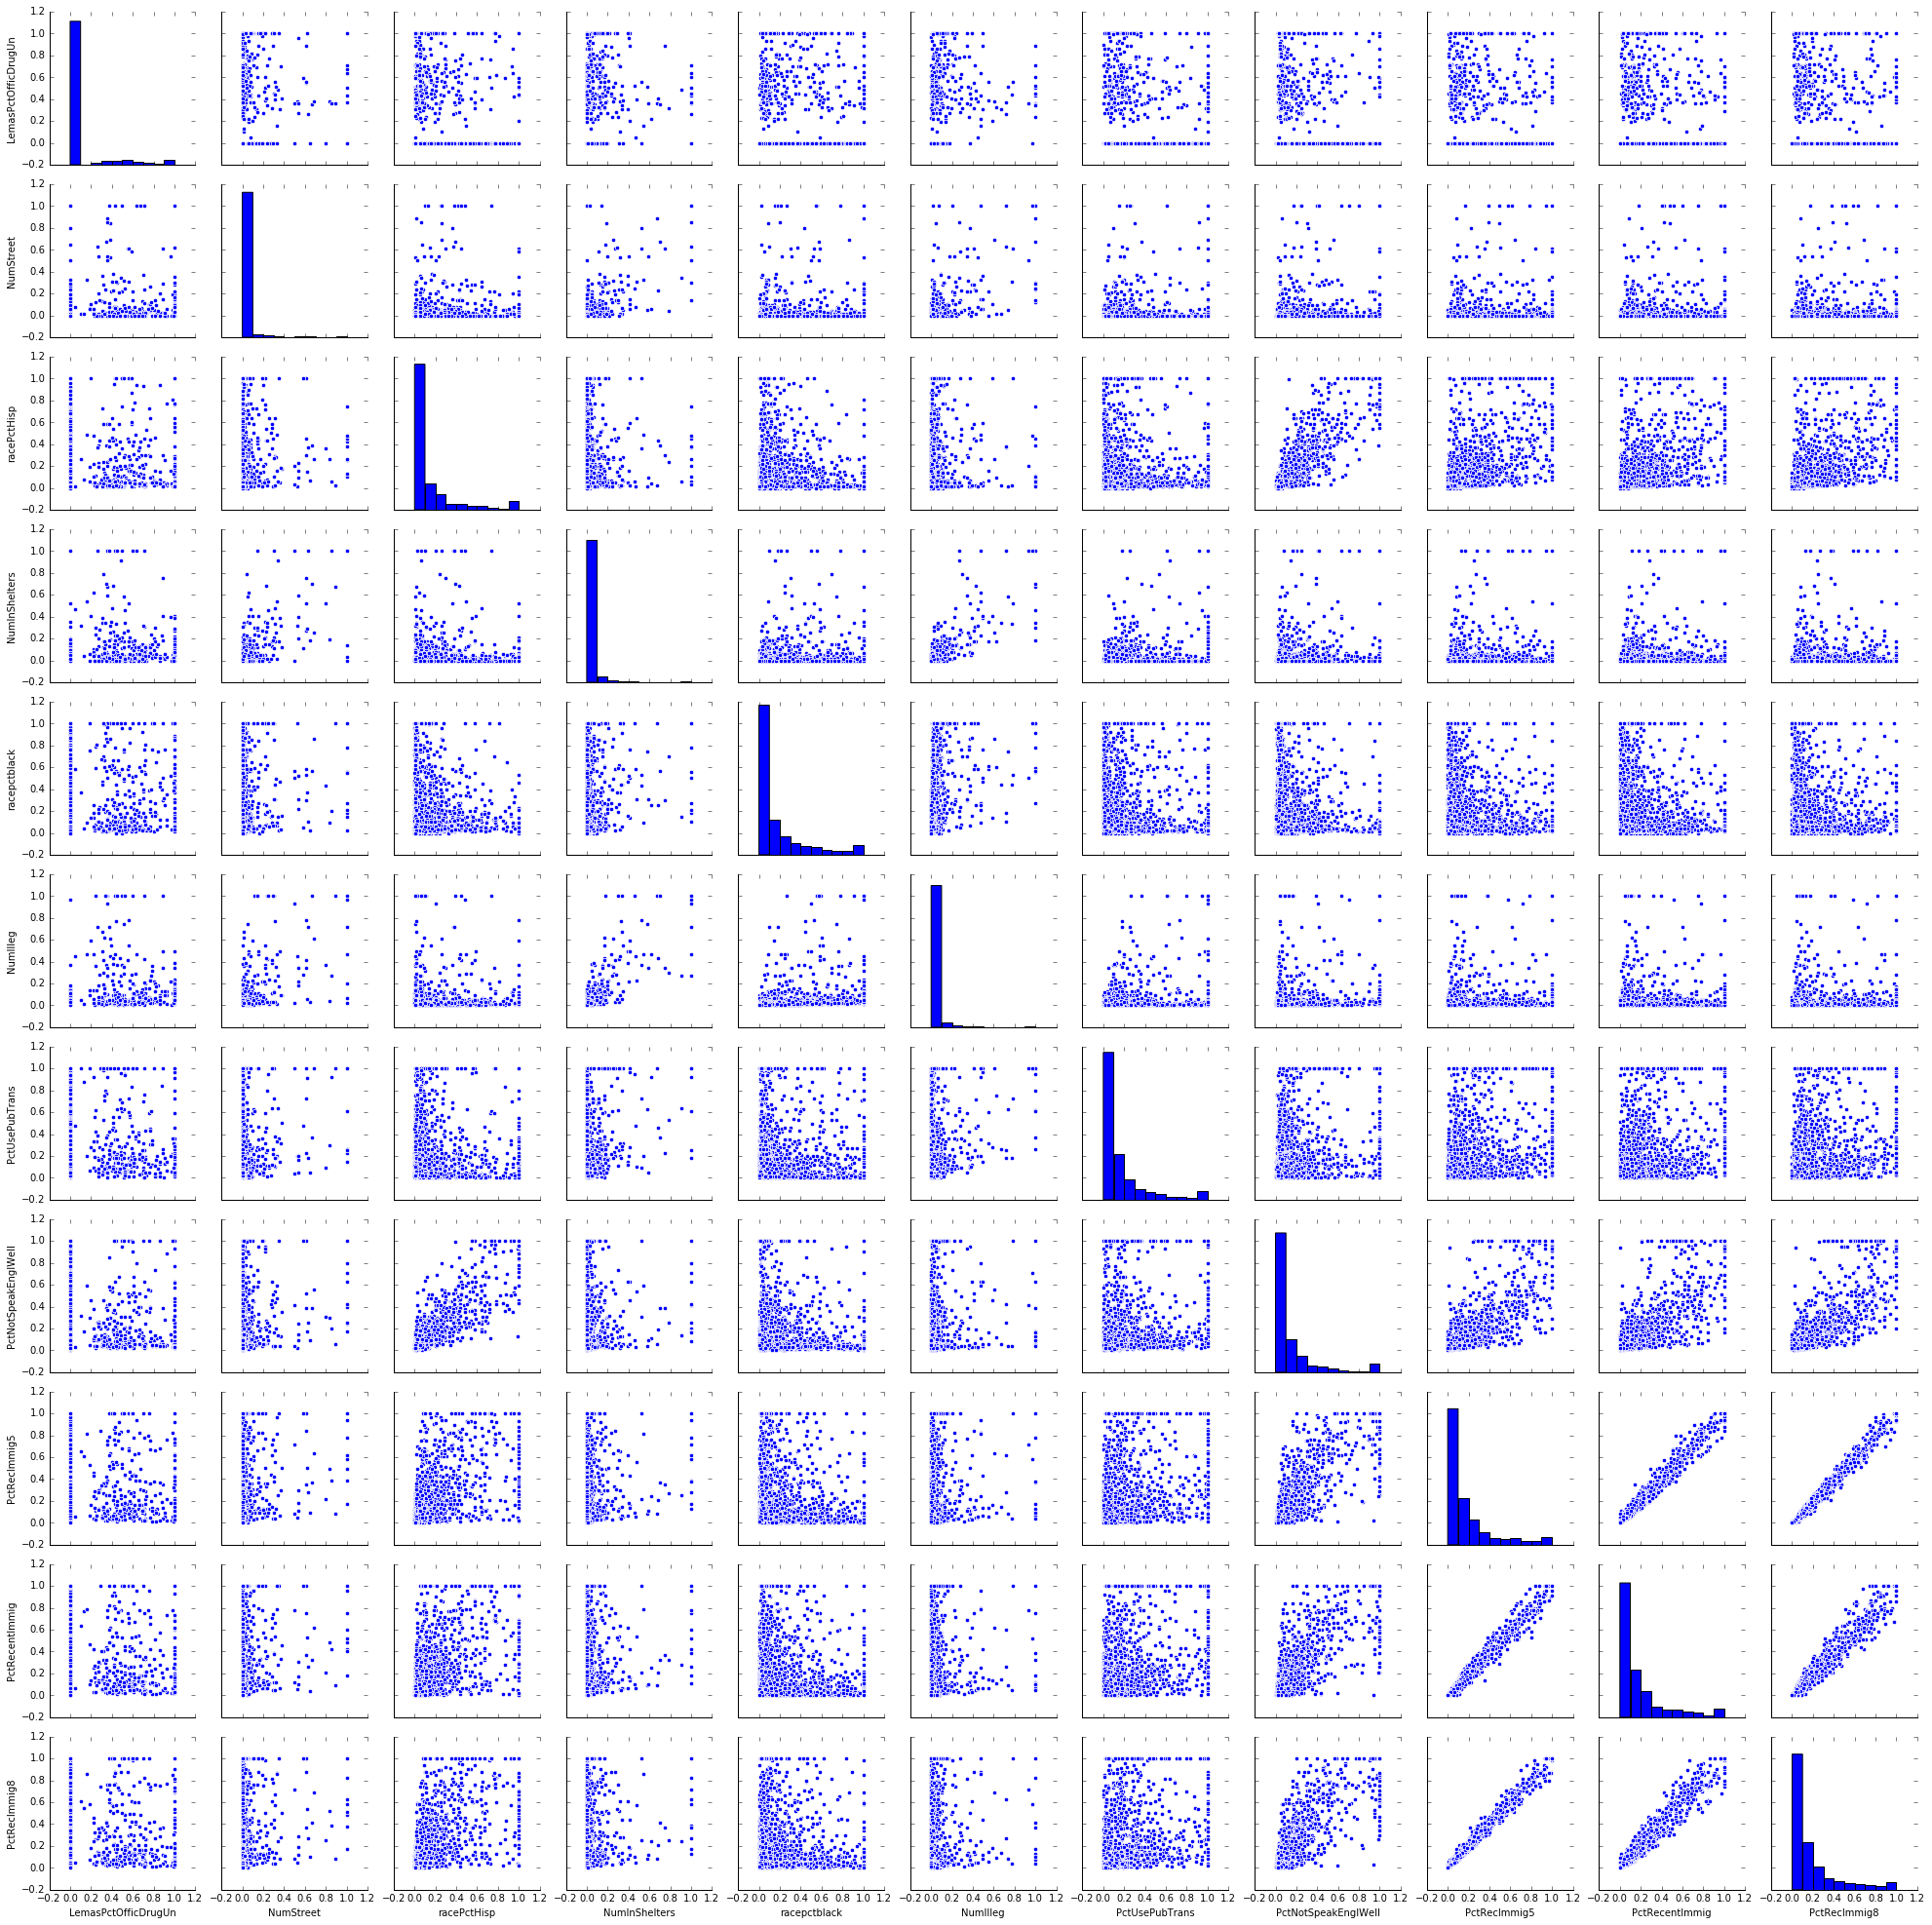

In [9]:
sns.pairplot(df[df_hivar[0]])

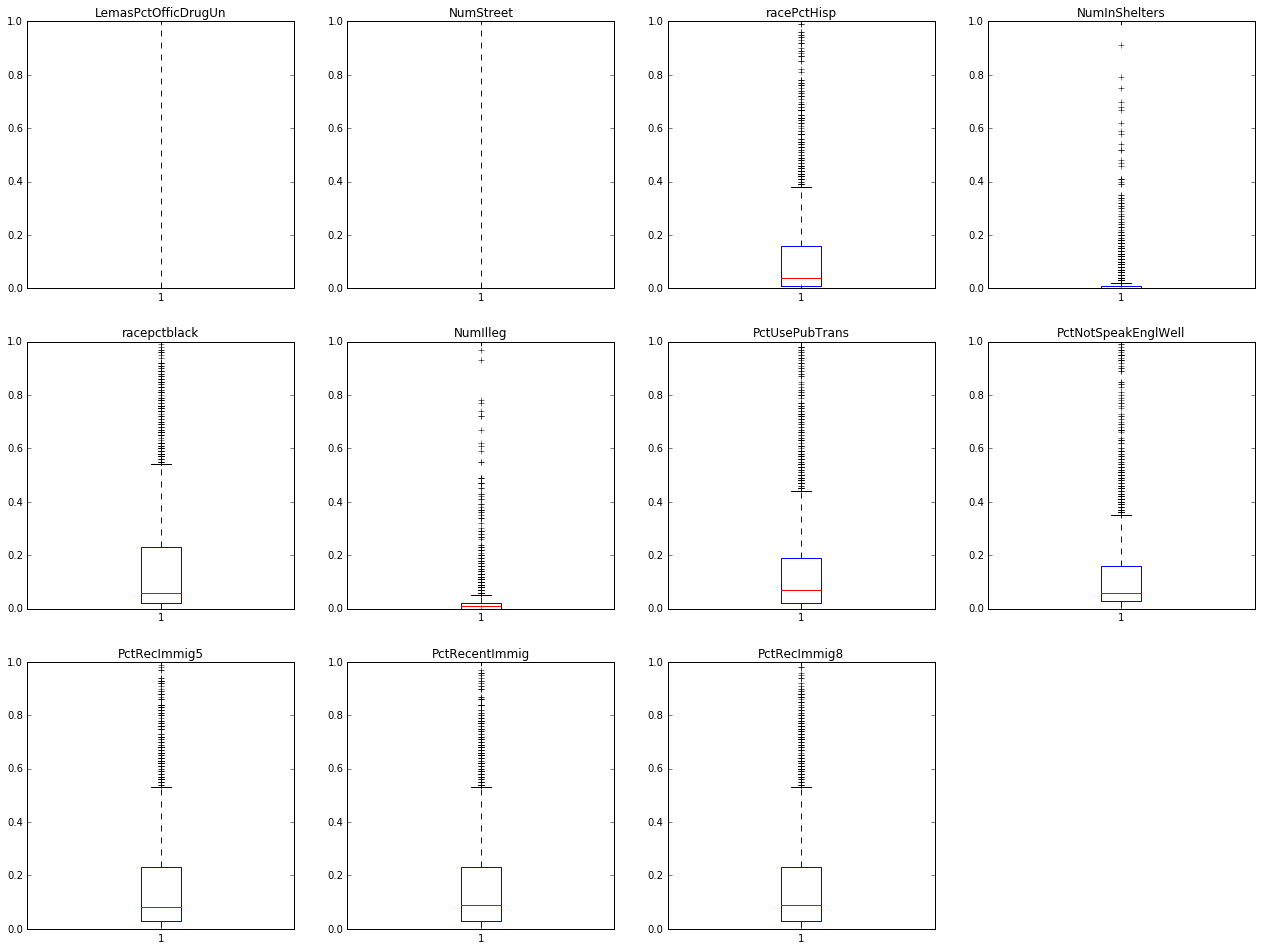

In [34]:
i=1
fig = plt.figure(figsize=(20,25))
#gridspec.GridSpec(11,6)
for c in df_hivar[0]:
    
    plt.subplot(4,4,i)
    plt.boxplot(df[c])
    plt.title(c)
    i+=1
fig.set_size_inches(w=22,h=22)
plt.show()


# Linear Regression
## (f) Fit a linear model using least squares to the training set and report the test error

In [11]:
#linear regression 
train_x=df_train.iloc[:,:123]
train_y=df_train.iloc[:,123:124]
test_x=df_test.iloc[:,:123]
test_y=df_test.iloc[:,123:124]


In [12]:

lr=linear_model.LinearRegression()
model=lr.fit(train_x, train_y)
y_predict=model.predict(test_x)

print("Test MSE for Least Squares", mean_squared_error(y_predict,test_y) )

('Test MSE for Least Squares', 0.77145549743811603)


# Ridge Regression 
## (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.


In [13]:
scale_arr=preprocessing.scale(df)
df_scale=pd.DataFrame(scale_arr)
df_train1=df_scale.iloc[0:1495,]
df_test1=df_scale.iloc[1495:,]
train_x1=df_train1.iloc[:,0:123]
train_y1=df_train1.iloc[:,123:124]
test_x1=df_test1.iloc[:,0:123]
test_y1=df_test1.iloc[:,123:124]


C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [14]:
model_rcv = RidgeCV(alphas=(0.1,1.0,10.0),cv=None).fit(train_x1, train_y1)

In [15]:
y_pred=model_rcv.predict(test_x1)
mse=mean_squared_error(y_pred,test_y1)
print("Mean Squared test Error for Ridge regression:",mse)

('Mean Squared test Error for Ridge regression:', 0.32871407429273375)


# LASSO

## (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model.Repeat with normalized features. Report the test error for both cases and compare them.

Since the datset is aleady normalized , there is nothing to compare 

In [16]:
model_lcv = LassoCV(cv=5, random_state=0,tol=0.001).fit(train_x1, train_y1.values.ravel())
y_pred=model_lcv.predict(test_x1)
mse=mean_squared_error(y_pred,test_y1)
print("Mean Squared test Error for Lasso:",mse)

('Mean Squared test Error for Lasso:', 0.32736612951449778)


In [17]:
coef=model_lcv.coef_
coef

array([ -2.25392615e-02,  -2.88511289e-04,   0.00000000e+00,
         2.90425637e-01,  -0.00000000e+00,  -5.71542406e-03,
        -0.00000000e+00,   4.23700050e-02,  -1.60612356e-01,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         7.21693280e-02,   0.00000000e+00,  -5.75007597e-02,
         1.75868368e-02,  -8.43920688e-02,   3.36773775e-02,
         2.66413317e-02,  -7.54898488e-02,   0.00000000e+00,
        -0.00000000e+00,  -3.62144747e-02,  -1.59237011e-02,
        -2.23108777e-02,   2.24444431e-02,   1.60833325e-02,
         1.69440951e-02,  -0.00000000e+00,  -1.12218769e-01,
        -5.75353305e-03,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   9.06124477e-02,  -4.21205695e-03,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         8.24117092e-02,   8.71287114e-02,  -4.21439926e-02,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -1.69339619e-01,  -3.30533098e-02,  -6.16048863e-03,
         0.00000000e+00,

In [18]:
c=train_x.columns.values
df_var=pd.DataFrame(np.column_stack([c, coef]))

In [19]:
df_var

,0,1
0,id,-0.0225393
1,population,-0.000288511
2,householdsize,0
3,racepctblack,0.290426
4,racePctWhite,-0
5,racePctAsian,-0.00571542
6,racePctHisp,-0
7,agePct12t21,0.04237
8,agePct12t29,-0.160612
9,agePct16t24,0


In [20]:
df_var_sel=df_var.loc[df_var[1]!=0].drop(0)

In [21]:
df_var_sel

,0,1
1,population,-0.000288511
3,racepctblack,0.290426
5,racePctAsian,-0.00571542
7,agePct12t21,0.04237
8,agePct12t29,-0.160612
12,pctUrban,0.0721693
14,pctWWage,-0.0575008
15,pctWFarmSelf,0.0175868
16,pctWInvInc,-0.0843921
17,pctWSocSec,0.0336774



## Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [22]:

l_mse = []
train_Y=np.array(train_y)
for i in range(1,123):
    pca = PCA(n_components=i)
#pca = PCA()
    reduce_data= pca.fit_transform(scale(train_x))
    kf = KFold(n_splits=5)
    MSE = []
    for train_index,val_index in kf.split(reduce_data):
        x_train, x_val = reduce_data[train_index.tolist()], reduce_data[val_index.tolist()]
        y_train, y_val = train_Y[train_index.tolist()], train_Y[val_index.tolist()]
        model = linear_model.LinearRegression()
        model = model.fit(x_train,y_train)
        pred = model.predict(x_val)
        actual = y_val
        mse = mean_squared_error(actual, pred)
        MSE.append(mse)
    l_mse.append(np.mean(MSE))
#kf = model_selection.KFold( n_splits=5, shuffle=True, random_state=1)

#df_train2=reduce_data.iloc[0:1495,]
#df_test2=reduce_data.iloc[1495:,]
#train_x2=df_train2.iloc[:,0:123]
#train_y2=df_train2.iloc[:,123:124]
#test_x2=df_test2.iloc[:,0:123]
#test_y2=df_test2.iloc[:,123:124]

C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: Data

In [23]:
pd.DataFrame({"Number of Components": range(1,123),"Validation MSE":l_mse})

,Number of Components,Validation MSE
0,1,0.033079
1,2,0.029359
2,3,0.028340
3,4,0.028356
4,5,0.026199
5,6,0.026290
6,7,0.025879
7,8,0.021931
8,9,0.021150
9,10,0.021055


In [24]:
np.argmin(l_mse) # index at 95 has a M value 96

95

In [25]:
pca = PCA(n_components=96)
X_PCA_train = pca.fit_transform(scale(train_x))
X_PCA_test = pca.fit_transform(scale(test_x))

Y_train = np.array(train_y)
Y_test = np.array(test_y)
model = linear_model.LinearRegression()
model = model.fit(X_PCA_train,Y_train)
pred = model.predict(X_PCA_test)
actual = Y_test
mse = mean_squared_error(actual, pred)
#print("Lambda value with least cv error ",model.alpha_)
print("Test set error for M = 96 components ",mse)


('Test set error for M = 96 components ', 0.047242998377704938)


C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app
C:\Users\manja\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


## (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost2 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [26]:
#j

alphas = [0.01, 0.05, 0.1, 0.2, 2,3, 4, 5, 10, 20, 50, 100, 200]
#alphas=10**np.linspace(10,-2,100)*0.5
l_mse = []
for a in alphas:
    kf = KFold(n_splits=5)
    MSE = []
    for train_index,val_index in kf.split(train_x):
        x_train, x_val = train_x.iloc[train_index.tolist(),:], train_x.iloc[val_index.tolist(),:]
        y_train, y_val = train_Y[train_index.tolist()], train_Y[val_index.tolist()]
        xgb = XGBRegressor(random_state=0,silent=False,reg_alpha=a)
        xgb.fit(x_train,y_train)
        pred = xgb.predict(x_val)
        actual = y_val
        mse = mean_squared_error(actual, pred)
        MSE.append(mse)
    l_mse.append(np.mean(MSE))

[14:38:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:38:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:38:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:38:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:38:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:38:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:38:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [27]:
pd.DataFrame({"L1 Penalty": alphas, "Validation MSE":l_mse})


,L1 Penalty,Validation MSE
0,0.01,0.020483
1,0.05,0.020091
2,0.10,0.020401
3,0.20,0.020377
4,2.00,0.019921
5,3.00,0.020005
6,4.00,0.020167
7,5.00,0.020228
8,10.00,0.021884
9,20.00,0.024951


In [28]:
np.argmin(l_mse)

4

## the selected alpha value is 2.0

In [29]:
xgb = XGBRegressor(random_state=0,silent=False,reg_alpha=2.0)
xgb.fit(train_x,train_y)
pred = xgb.predict(test_x)
actual = test_y
mse = mean_squared_error(actual, pred)

[14:39:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:39:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:39:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:39:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:39:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:39:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:39:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [30]:
print("Mean Squared error using XGboost :",mse)

('Mean Squared error using XGboost :', 0.016894439228603095)
